In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 1s 0us/step


In [12]:
model = keras.Sequential()
model.add(layers.Conv2D(16, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
#model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(8, kernel_size=3, activation="relu"))
############################################################
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

In [25]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
              loss=tf.keras.metrics.sparse_categorical_crossentropy,
              metrics=['accuracy']
              )

class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode="min", verbose=1, patience=5) # 50

In [28]:
history = model.fit(x_train, y_train, 
    epochs=30,
    batch_size=128,
    validation_split=0.1,
    verbose=0,
    callbacks=[PrintDot()])


..............................

In [32]:
hist1 = pd.DataFrame(history.history)
hist1['epoch'] = history.epoch
hist1.tail(30)

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.973405,0.454167,0.822300,0.722833,0
1,0.781084,0.759611,0.564494,0.815833,1
2,0.554312,0.828981,0.548511,0.826167,2
3,0.503055,0.842352,0.434187,0.865333,3
4,0.457202,0.857333,0.425405,0.864000,4
5,0.511585,0.838741,0.412812,0.864333,5
6,0.460043,0.854444,0.396751,0.868833,6
7,0.408979,0.873722,0.315825,0.904333,7
8,0.381860,0.881796,0.323624,0.901167,8
9,0.373765,0.885722,0.297358,0.906167,9


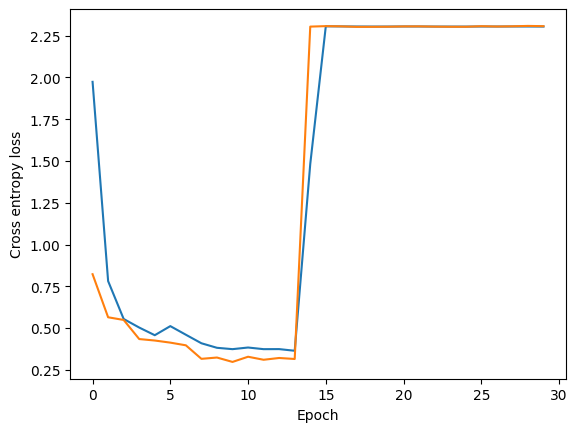

In [31]:
def plot_history_loss(hist):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Cross entropy loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error', )
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    
plot_history_loss(hist1)
